### Team Contributions

1. Shunta Muto: converting Event Description (Tag) column into category, EDA plots on event causes, creating a dataframe to use for classification, pre-processing # of Customers Affected, random forest modeling, feature importance plot, standardizing the numeric features and CV tuning all models
2. Bella (Yifei) Ding: Converting Geographic Areas into states, EDA plot on region distribution, converting the response variable (event cause) into numbers, logistic regression modeling, commenting on the code to reflect teammates' contributions
3. Eissa Qader: dropping rows with unknown values, computing the duration of each outage, classfiying seasons and day/night for the events, one hot encoding catogrical variables, imputing # of Customers Affected, SVM modeling

## 1. Exploratory Data Analysis

In [1]:
# import all necessary packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# import dataset
pathToData='data.csv'
data=pd.read_csv(pathToData)

In [2]:
# Drop Nulls and Unknowns (Eissa)
data = data[data["Date of Restoration"] != "Unknown"]
#print(len(data))
data = data[data["Date of Restoration"] != "Ongoing"]
#print(len(data))
data = data[data["Time Event Began"].notnull()]
#print(len(data))
data = data[data["Date of Restoration"].notnull()]
#print(len(data))
data = data[data["Time Event Began"] != "NaN"]
#print(len(data))
data = data[data["Time of Restoration"] != "NaN"]
#print(len(data))
data = data[data["Time of Restoration"].notnull()]
#print(len(data))
data = data.drop("Demand Loss (MW)", axis=1)
#print(len(data))
data = data[data["Number of Customers Affected"] != "Unknown"]
#print(len(data))
data = data[data["Number of Customers Affected"].notnull()]
#print(len(data))


In [3]:
"""
Bella's code to convert Geographic Areas into states
"""

# Define dictionaries to convert geographic areas
data['Regions_raw'] = data['Geographic Areas']

regions = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', \
    'Colorado', 'Connecticut', 'Washington DC', 'Delaware', 'Florida', 
    'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 
    'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 
    'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 
    'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 
    'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 
    'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 
    'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 
    'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming',
    'Canada', 'Puerto Rico', 'Mexico', 'Midwest', 'New England', 'Southern Company Territory',
    'Western Region of Service Territory', 'AEP Region']

outliers = {'District of Columbia': 'Washington DC', 'Connecicut': 'Connecticut',\
    'British Columbia': 'Canada', 'Puget Sound Region': 'Washington', 
    'Denver': 'Colorado', 'San Diego': 'California', 'Long Island': 'New York',
    'Delmarva Peninsula': 'Delaware', 'San Francisco': 'California',
    'Sacramento': 'California', 'Houston': 'Texas', 'ERCOT': 'Texas', 
    'ComEd': 'Illinois', 'Edmonston': 'California', 'Hydro Electric': 'California',
    'Kentrucky': 'Kentucky', 'TVA': 'Tennessee', 'CA': 'California',
    'NC': 'North Carolina', 'NJ': 'New Jersey', 'NY': 'New York', 'Newark': 'Delaware',
    'Chicago': 'Illinois', 'Cincinnati': 'Ohio', 'Detroit': 'Michigan',
    'Morgan City': 'Louisiana', 'TX': 'Texas', 'AEP': 'AEP Region', 'Los Angeles': 'California',
    'Brazoria': 'Texas', 'Tampa': 'Florida', 'North Part of': 'Puerto Rico',
    'Lubbock': 'Texas', 'Seattle': 'Washington', 'BGE': 'Maryland', 'PEF': 'Florida',
    'Dominion': 'Virginia', 'Dayton': 'Ohio', 'Califonia': 'California',
    'Phoenix': 'Arizona', 'Maui': 'Hawaii', 'Oahu': 'Hawaii', 'Grimes': 'Texas',
    'Bakersfield': 'California', 'Delmarva Power': 'Delaware', 'Nacogdoches': 'Texas',
    'Alachua': 'Florida', 'Akron': 'Ohio', 'Columbus': 'Ohio', 'Nova': 'Canada',
    'Mayaguez': 'Puerto Rico', 'Cleveland': 'Ohio', 'Tupper': 'New York',
    'King County': 'Washington', 'Allentown': 'Pennsylvania', 'Cities of Bryan': 'Texas'}

# Replace cell values based on the dictionaries
for k, v in outliers.items():
    data['Regions_raw'] = np.where(data['Regions_raw'].str.contains(k, case=True), v, data['Regions_raw'])

for item in regions:
    data.loc[data['Regions_raw'].str.contains(item, na=False), 'Region'] = item

In [4]:
"""
Eissa's code to compute outage duration
"""

import re

# Standardize the time format
data["Time Event Began"] = data["Time Event Began"].str.replace("a.m.", "AM")
data["Time Event Began"] = data["Time Event Began"].str.replace("p.m.", "PM")
data["Time Event Began"] = data["Time Event Began"].str.replace(".", "")

# Filter for only data that meets the data format requiremetns
data = data[data["Time Event Began"].str.match(r'\b((1[0-2]|0?[1-9]):([0-5][0-9]) ([AP][M]))')] 

# Convert to datetime
data["Time Event Began"] = pd.to_datetime(data["Time Event Began"], format="%I:%M %p")

C:\Users\bella\AppData\Local\Temp\ipykernel_2036\1954504764.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Time Event Began"] = data["Time Event Began"].str.replace("a.m.", "AM")
C:\Users\bella\AppData\Local\Temp\ipykernel_2036\1954504764.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Time Event Began"] = data["Time Event Began"].str.replace("p.m.", "PM")
C:\Users\bella\AppData\Local\Temp\ipykernel_2036\1954504764.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Time Event Began"] = data["Time Event Began"].str.replace(".", "")


In [5]:
data["Time of Restoration"] = data["Time of Restoration"].str.replace("a.m.", "AM")
data["Time of Restoration"] = data["Time of Restoration"].str.replace("p.m.", "PM")
data["Time of Restoration"] = data["Time of Restoration"].str.replace(".", "")

data = data[data["Time of Restoration"].str.match(r'\b((1[0-2]|0?[1-9]):([0-5][0-9]) ([AP][M]))')]

# Convert to datetime
data["Time of Restoration"] = pd.to_datetime(data["Time of Restoration"], format="%I:%M %p")

C:\Users\bella\AppData\Local\Temp\ipykernel_2036\3083108733.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Time of Restoration"] = data["Time of Restoration"].str.replace("a.m.", "AM")
C:\Users\bella\AppData\Local\Temp\ipykernel_2036\3083108733.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Time of Restoration"] = data["Time of Restoration"].str.replace("p.m.", "PM")
C:\Users\bella\AppData\Local\Temp\ipykernel_2036\3083108733.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Time of Restoration"] = data["Time of Restoration"].str.replace(".", "")


In [6]:
data["Date Event Began"] = pd.to_datetime(data['Date Event Began'])
data["Date of Restoration"] = pd.to_datetime(data['Date of Restoration'])

data[:5]

,Event Description,Year,Date Event Began,Time Event Began,Date of Restoration,Time of Restoration,Respondent,Geographic Areas,NERC Region,Number of Customers Affected,Tags,Regions_raw,Region
0,Severe Weather - Thunderstorms,2014,2014-06-30,1900-01-01 20:00:00,2014-07-02,1900-01-01 18:30:00,Exelon Corporation/ComEd,Illinois,RFC,"420,000","severe weather, thunderstorm",Illinois,Illinois
1,Severe Weather - Thunderstorms,2014,2014-06-30,1900-01-01 23:20:00,2014-07-01,1900-01-01 17:00:00,Northern Indiana Public Service Company,North Central Indiana,RFC,"127,000","severe weather, thunderstorm",North Central Indiana,Indiana
2,Severe Weather - Thunderstorms,2014,2014-06-30,1900-01-01 17:55:00,2014-07-01,1900-01-01 02:53:00,We Energies,Southeast Wisconsin,MRO,"120,000","severe weather, thunderstorm",Southeast Wisconsin,Wisconsin
7,Severe Weather - Thunderstorms,2014,2014-06-18,1900-01-01 17:00:00,2014-06-20,1900-01-01 15:00:00,Detroit Edison Co,Southeast Michigan,RFC,"138,802","severe weather, thunderstorm",Southeast Michigan,Michigan
8,Severe Weather - Thunderstorms,2014,2014-06-15,1900-01-01 00:00:00,2014-06-15,1900-01-01 01:00:00,Xcel Energy,Central Minnesota,MRO,"55,951","severe weather, thunderstorm",Central Minnesota,Minnesota


In [7]:
# Combine date and time
data['Event Began'] = pd.to_datetime(data['Date Event Began'].dt.strftime("%Y-%m-%d")+ ' ' + data['Time Event Began'].dt.strftime("%H:%M:%S"))
data['Event Ended'] = pd.to_datetime(data['Date of Restoration'].dt.strftime("%Y-%m-%d")+ ' ' + data['Time of Restoration'].dt.strftime("%H:%M:%S"))


# Duration, season, day/night
data["Duration"] = (data['Event Ended'] - data['Event Began']).astype('timedelta64[m]')

values = [1,0]
conditions = [(data['Event Began'].dt.hour > 19) | (data['Event Began'].dt.hour <= 7),
             (data['Event Began'].dt.hour > 7) & (data['Event Began'].dt.hour <= 19)]

data['DayNight'] = np.select(conditions, values)

data["Season"] = data['Event Began'].dt.month % 12 // 3 + 1
# 19 rows have time began > time ended
#len(data[data["Duration"] < 0])


In [8]:
# Resets the index
data=data.reset_index(drop=True)

In [9]:
"""
Shunta's code to convert Event Description (Tag) column into category.
# show the top 30 frequent events in histogram
#data['Tags'].value_counts()[:20].plot(kind='bar')
category.value_counts().plot(kind='bar')
ax = plt.gca()
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
plt.title('Event Frequency')
plt.show()
"""
def get_raw_category_id(data):
    tags=data['Tags'].to_list()
    keywords=data['Tags'].value_counts().index.to_list()[0:20]#top 20
    
    #new_keywords should contain only 1 'severe weather'
    new_keywords=['severe weather']
    for word in keywords:
        if word=='vandalism':
            continue
        elif not 'weather' in word:
            new_keywords.append(word)
    keywords=new_keywords
    
    new_keywords=['fuel supply emergency']
    for word in keywords:
        if not 'fuel supply emergency' in word:
            new_keywords.append(word)
    keywords=new_keywords
    print(keywords)
    
    category_id=[]
    category=[]
    for tag in tags:
        # empty string.
        if not isinstance(tag,str):
            category_id.append(len(keywords))
            category.append('invalid')
            continue
            
        words=tag.split(',')
        if tag in keywords: #exact match
            category_id.append(keywords.index(tag))
            category.append(tag)
        elif words[0] in keywords: #if not exact match, find if the first string is a match
            category_id.append(keywords.index(words[0]))
            category.append(words[0])
        elif words[0]=='vandalism':
            category_id.append(keywords.index('vandalism, physical'))        
            category.append('vandalism, physical')
        else: #'others' category
            category_id.append(len(keywords))
            category.append('invalid')
            
    #return dictionary of categories
    categories=dict()
    for ind,key in enumerate(keywords):
        categories[key]=ind        
    categories['invalid']=len(keywords)

    #return as panda dataframe
    category=pd.DataFrame({'Event Cause':category},dtype='category')
    
    return category,categories

category,categories=get_raw_category_id(data)
data=data.join(category)
#data=pd.concat([data,category],axis=1,ignore_index=True)

['fuel supply emergency', 'severe weather', 'vandalism, physical', 'load shedding', 'islanding', 'equipment failure', 'public appeal', 'transmission interruption', 'generator trip', 'vandalism, cyber', 'unknown', 'wild fire, load shedding', 'voltage reduction']


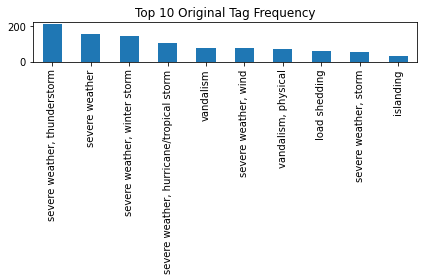

In [10]:
# Plot the top 10 causes (Shunta)
data['Tags'].value_counts()[:10].plot(kind='bar')
plt.title('Top 10 Original Tag Frequency')
plt.tight_layout()
plt.savefig('tag_freq.jpeg')
plt.show()


In [11]:
# Remove unnecessary/invalid data points
data = data[data["Event Cause"] != "unknown"]
data = data[data["Event Cause"] != "invalid"]
data = data[data["Duration"]>0]
data.head()
data=data.reset_index(drop=True)

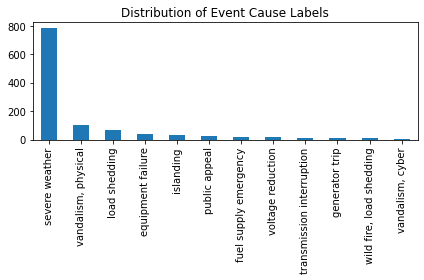

In [12]:
# Plot top 12 causes (Shunta)
data['Event Cause'].value_counts()[:12].plot(kind='bar')
plt.title('Distribution of Event Cause Labels')
plt.tight_layout()
plt.savefig('event_freq.jpeg')
plt.show()

Text(0, 0.5, 'Count')

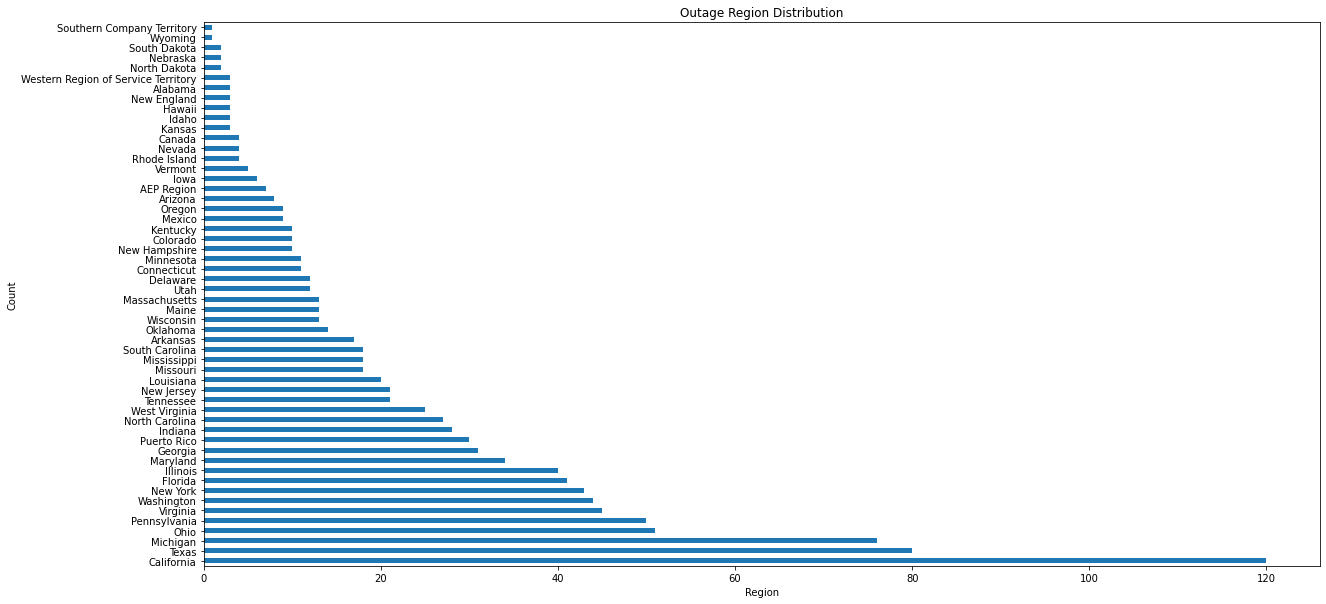

In [13]:
# Plot the distribution of region (Bella)
data['Region'].value_counts().plot(kind='barh', figsize=(20,10))

# plt.xticks(rotation=70, horizontalalignment="center")
plt.title("Outage Region Distribution")
plt.xlabel("Region")
plt.ylabel("Count")

In [14]:
# Create a dataframe to use for classification (Shunta)
columns_to_use=['Event Cause','NERC Region','Number of Customers Affected','Duration','DayNight','Season']
new_data=pd.DataFrame()

for col in columns_to_use:
    new_data[col]=data[col]

In [15]:
# One hot Encode the categorical columns (Eissa)
new_data["Season"] = new_data["Season"].astype(str)


cat_col = ["NERC Region", "Season"]

for col in cat_col:
    # Get one hot encoding of columns
    one_hot = pd.get_dummies(new_data[col], prefix=col)
    # Drop column as it is now encoded
    new_data = new_data.drop(col, axis = 1)
    # Join the encoded df
    new_data = new_data.join(one_hot)

In [16]:
new_data.head()

,Event Cause,Number of Customers Affected,Duration,DayNight,NERC Region_ECAR,NERC Region_ERCOT,NERC Region_FRCC,NERC Region_HECO,NERC Region_HI,NERC Region_MAAC,...,NERC Region_RFC,"NERC Region_RFC, SERC",NERC Region_SERC,NERC Region_SPP,NERC Region_TRE,NERC Region_WECC,Season_1,Season_2,Season_3,Season_4
0,severe weather,"420,000",2790.0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,severe weather,"127,000",1060.0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,severe weather,"120,000",538.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,severe weather,"138,802",2760.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,severe weather,"55,951",60.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
print('%-28s%10s' %('Event Cause','Proportion of Data'))
new_data['Event Cause'].value_counts()[:12]/len(new_data['Event Cause'].to_list())

Event Cause                 Proportion of Data


severe weather               0.700268
vandalism, physical          0.088314
load shedding                0.062444
equipment failure            0.033006
islanding                    0.030330
public appeal                0.023194
fuel supply emergency        0.014273
voltage reduction            0.013381
transmission interruption    0.011597
generator trip               0.009813
wild fire, load shedding     0.007136
vandalism, cyber             0.006244
Name: Event Cause, dtype: float64

In [18]:
new_data[new_data['Event Cause']=='load shedding']

,Event Cause,Number of Customers Affected,Duration,DayNight,NERC Region_ECAR,NERC Region_ERCOT,NERC Region_FRCC,NERC Region_HECO,NERC Region_HI,NERC Region_MAAC,...,NERC Region_RFC,"NERC Region_RFC, SERC",NERC Region_SERC,NERC Region_SPP,NERC Region_TRE,NERC Region_WECC,Season_1,Season_2,Season_3,Season_4
12,load shedding,"28,000",52.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
60,load shedding,"104,498",90.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
78,load shedding,37,152.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
91,load shedding,"21,800",227.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
101,load shedding,"262,937",20.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,load shedding,"35,000",95.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1095,load shedding,"192,000",37.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1112,load shedding,1 PG&E,336.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1113,load shedding,"25,000",230.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [19]:
"""
Bella's code to convert event causes into numbers
"""

# extract the unique event causes
unique_causes = new_data['Event Cause'].unique()
causes_count = len(unique_causes)
causes_label = np.arange(1, causes_count + 1)

# replace the event causes with numbers for further classification
# new_data['Causes'] = new_data['Event Cause']
new_data['Event Cause'].replace(unique_causes, causes_label, inplace=True)
#new_data

# can delete this code if needed (found nan values in "event causes" - category 13)
new_data = new_data[new_data["Event Cause"] != 13]
new_data.head()

,Event Cause,Number of Customers Affected,Duration,DayNight,NERC Region_ECAR,NERC Region_ERCOT,NERC Region_FRCC,NERC Region_HECO,NERC Region_HI,NERC Region_MAAC,...,NERC Region_RFC,"NERC Region_RFC, SERC",NERC Region_SERC,NERC Region_SPP,NERC Region_TRE,NERC Region_WECC,Season_1,Season_2,Season_3,Season_4
0,1,"420,000",2790.0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,"127,000",1060.0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,"120,000",538.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,"138,802",2760.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,"55,951",60.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
"""
 Shunta's code to pre-process # of Customers Affected.
 =>Convert to numeric type and set all edge cases to NaNs.
 =>there are only ~70 NaNs, so perhaps we can impute.
"""
new_col=[]
for el in new_data['Number of Customers Affected']:
    new_el=el.replace(',','') #e.g. convert '1,000'=>'1000'
    try:
        new_num=int(new_el)
    except:
        new_num=int(-1)

    new_col.append(new_num)
    
new_col=np.array(new_col)
new_col=pd.DataFrame({'Number of Customers Affected':new_col},dtype=float)
new_col=new_col.replace(-1, np.NaN)

new_data = new_data.drop('Number of Customers Affected', axis = 1)
new_data=new_data.join(new_col)

print('number of NaN data points')
new_data['Number of Customers Affected'].isnull().sum()

number of NaN data points


75

In [21]:
"""
Eissa's code to impute Number of Customers Affected
"""

# Impute the mean for each class for Number of Customers Affected
new_data['Number of Customers Affected'] = new_data.groupby('Event Cause')['Number of Customers Affected'].transform(lambda x: x.fillna(x.mean()))

new_data['Number of Customers Affected']

0        420000.0
1        127000.0
2        120000.0
3        138802.0
4         55951.0
          ...    
1116    1881134.0
1117      95000.0
1118      60000.0
1119     130000.0
1120      75000.0
Name: Number of Customers Affected, Length: 1121, dtype: float64

## 2. Modeling 

### Random Forest Classification (Shunta)

In [22]:
# data split.
colnames=list(new_data.columns)
X=new_data[colnames[1:]]
y=new_data['Event Cause']
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2, random_state=1, stratify=y)

c:\Users\bella\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

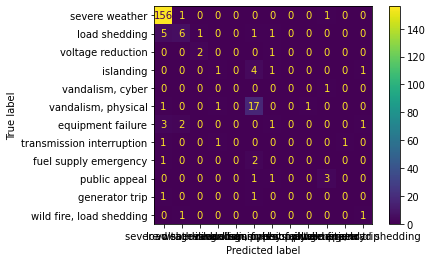

c:\Users\bella\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bella\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bella\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

                           precision    recall  f1-score   support

           severe weather       0.93      0.99      0.96       158
            load shedding       0.60      0.43      0.50        14
        voltage reduction       0.67      0.67      0.67         3
                islanding       0.33      0.14      0.20         7
         vandalism, cyber       0.00      0.00      0.00         1
      vandalism, physical       0.65      0.85      0.74        20
        equipment failure       0.20      0.14      0.17         7
transmission interruption       0.00      0.00      0.00         3
    fuel supply emergency       0.00      0.00      0.00         3
            public appeal       0.60      0.60      0.60         5
           generator trip       0.00      0.00      0.00         2
 wild fire, load shedding       0.33      0.50      0.40         2

                 accuracy                           0.83       225
                macro avg       0.36      0.36      0.35    

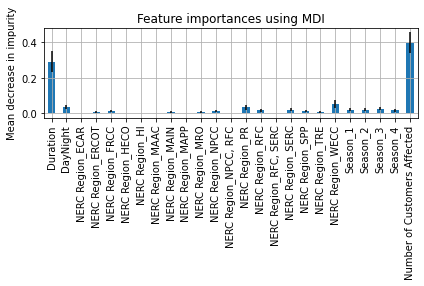

In [23]:
# fit the model
model_RF = RandomForestClassifier()

#cross validation
param_grid = {
                 'n_estimators': [50,100,200,300],
             }
grid_clf = GridSearchCV(model_RF, param_grid, cv=10)
grid_clf.fit(Xtrain, ytrain)

# calculate metrics on test data
yhat = grid_clf.predict(Xtest)

#show confusion matrix==========================================================
cm = confusion_matrix(ytest, yhat,labels=causes_label)
plt.figure()
disp=ConfusionMatrixDisplay(cm,display_labels=unique_causes.to_list())
disp.plot()
plt.show()

#classification report
print(classification_report(np.array(ytest),yhat,labels=causes_label,target_names=unique_causes.to_list()))


#Feature importance==============================================================
importances = grid_clf.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in grid_clf.best_estimator_.estimators_], axis=0)
forest_importances = pd.Series(importances, index=list(Xtrain.columns))

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.grid()
plt.show()

### Support Vector Machine (Eissa)

#### For SVM and logistic regression, standardize the numeric features

In [24]:
# standardize the numeric columns
colnames=list(new_data.columns)

# define X in numpy array and y
X=new_data[colnames[1:]].to_numpy()
y=new_data['Event Cause']

# standardize numeric features
Xnew=np.hstack((np.expand_dims(X[:,0],axis=1),np.expand_dims(X[:,-1],axis=1)))
scaler=StandardScaler()
scaler.fit(Xnew)
Xnew= scaler.transform(Xnew)
X[:,0]=Xnew[:,0]
X[:,-1]=Xnew[:,1] #replace cols of numpy array

#then re-convert to dataframe
X=pd.DataFrame(data=X,columns=colnames[1:])

#re-define categorical variables in integer datatype
cols_to_convert=colnames[2:-1]
for col in cols_to_convert:
    X[col]=X[col].astype(np.int64)

#perform the usual train/test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2, random_state=1, stratify=y)

In [25]:
# Instantiate an SVM model
#modelSVM = make_pipeline(StandardScaler(), SVC(gamma='auto'))
modelSVM = SVC(gamma='auto',max_iter=8000) #max iter set to terminate in reasonable time
#modelSVM.fit(Xtrain, ytrain)

#cross validation
param_grid = {
                 'kernel':["poly", 'rbf', 'sigmoid'],
                 'C':[0.01,0.1,0.8,1.6,10],
             }
grid_clf = GridSearchCV(modelSVM, param_grid, cv=5)
grid_clf.fit(Xtrain, ytrain)

# Predict on the test set
SVMResults = grid_clf.predict(Xtest)

# Print results
print(classification_report(ytest, SVMResults))

print(grid_clf.best_estimator_)
print(grid_clf.best_estimator_.kernel)

              precision    recall  f1-score   support

           1       0.85      1.00      0.92       158
           2       0.50      0.29      0.36        14
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         1
           6       0.58      0.90      0.71        20
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         3
           9       1.00      0.33      0.50         3
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2

    accuracy                           0.80       225
   macro avg       0.24      0.21      0.21       225
weighted avg       0.70      0.80      0.74       225

SVC(C=10, gamma='auto', max_iter=8000)
rbf


c:\Users\bella\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bella\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bella\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

### Logisitic Regression (Bella)

In [26]:
#instantiate a model
modelLogit = LogisticRegression(max_iter=8000) #max iter set to terminate in reasonable time

#cross validation to find the best estimator
param_grid = {
                 'C':[0.4,0.8,1.6,10,12,15],
             }
grid_clf = GridSearchCV(modelLogit, param_grid, cv=10)
grid_clf.fit(Xtrain, ytrain)

# Predict on the test set
logitResults = grid_clf.predict(Xtest)

# Print results
print(classification_report(ytest, logitResults))

print(grid_clf.best_estimator_)

c:\Users\bella\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


              precision    recall  f1-score   support

           1       0.91      0.99      0.95       158
           2       0.50      0.50      0.50        14
           3       0.50      0.33      0.40         3
           4       0.20      0.14      0.17         7
           5       0.00      0.00      0.00         1
           6       0.67      0.90      0.77        20
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         3
           9       0.50      0.33      0.40         3
          10       0.75      0.60      0.67         5
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2

    accuracy                           0.83       225
   macro avg       0.34      0.32      0.32       225
weighted avg       0.77      0.83      0.80       225

LogisticRegression(C=10, max_iter=8000)


c:\Users\bella\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bella\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bella\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av